Python code to generate the plots from the matlab experiments.

In [59]:
import scipy.io as spio
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
pwd

'/Users/cdickens/Desktop/high-leverage-rows/figures'

In [61]:
mat_identity = spio.loadmat('../scripts/census/regression/census_identity.mat', squeeze_me=True)
mat_orth = spio.loadmat('../scripts/census/regression/census_orth.mat', squeeze_me=True)
mat_spc3 = spio.loadmat('../scripts/census/regression/census_condition_spc3.mat', squeeze_me=True)
mat_uniform = spio.loadmat('../scripts/census/regression/census_uniform_sampling.mat', squeeze_me=True)

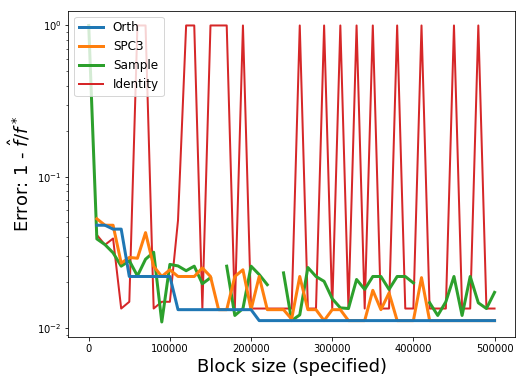

In [65]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['error'], label = 'Identity', linewidth=2, zorder=2)

ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error: 1 - $\hat{f}/f^*$', fontsize=18)
ax.set_xlabel('Block size (specified)', fontsize=18)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fancybox=True, fontsize=12)

fig.savefig('census_error_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

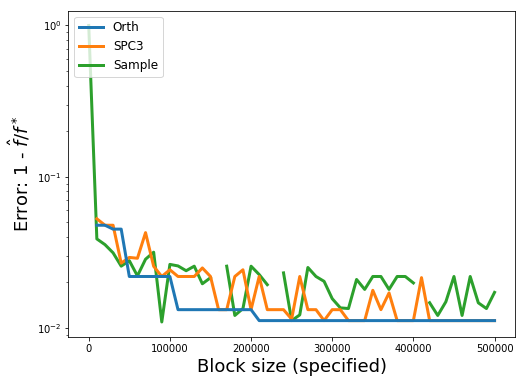

In [66]:
# same plot but without the identity basis

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['block_sizes'], mat_identity['error'], label = 'Identity', linewidth=2, zorder=2)

ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error: 1 - $\hat{f}/f^*$', fontsize=18)
ax.set_xlabel('Block size (specified)', fontsize=18)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fancybox=True, fontsize=12)

fig.savefig('census_error_vs_block_size_no_identity.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

In [50]:
import numpy as np
summary_error_orth = np.vstack((mat_orth['storage'], mat_orth['error'])).T
summary_error_orth[summary_error_orth[:,1].argsort()]
#summary_error #= np.sort(summary_error, axis=0)


summary_error_mat_spc3 = np.vstack((mat_spc3['storage'], mat_spc3['error'])).T
summary_error_mat_spc3[summary_error_mat_spc3[:,1].argsort()]


array([[  1.29894000e+05,   1.11723114e-02],
       [  2.64466000e+05,   1.11723114e-02],
       [  1.70832000e+05,   1.11723114e-02],
       [  2.41101000e+05,   1.11723114e-02],
       [  2.04294000e+05,   1.11723114e-02],
       [  1.75166000e+05,   1.11723114e-02],
       [  2.48520000e+05,   1.11723114e-02],
       [  1.65752000e+05,   1.11723114e-02],
       [  2.35354000e+05,   1.11723114e-02],
       [  1.53119000e+05,   1.11723114e-02],
       [  1.40844000e+05,   1.11723114e-02],
       [  1.52384000e+05,   1.11723114e-02],
       [  1.50236000e+05,   1.11723114e-02],
       [  1.51862000e+05,   1.11723114e-02],
       [  1.33123000e+05,   1.11723114e-02],
       [  2.33687000e+05,   1.11723114e-02],
       [  9.61400000e+04,   1.14336896e-02],
       [  1.03979000e+05,   1.31977411e-02],
       [  1.31252000e+05,   1.31977411e-02],
       [  1.67037000e+05,   1.31977411e-02],
       [  1.07720000e+05,   1.31977411e-02],
       [  7.71630000e+04,   1.31977411e-02],
       [  

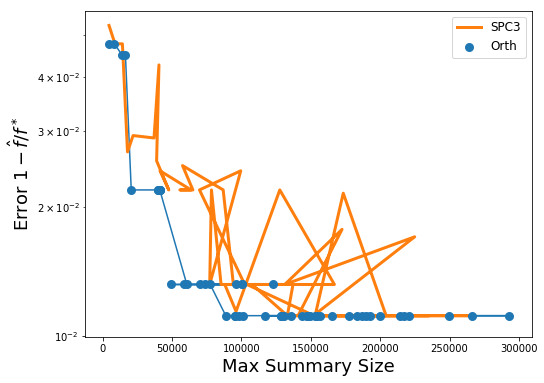

In [51]:
fig, ax = plt.subplots(figsize=(8,6))



ax.plot(summary_error[:,0], summary_error[:,1])
ax.scatter( mat_orth['storage'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['storage'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
#ax.scatter( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['storage'], mat_identity['error'], label = 'Identity', linewidth=3.0, zorder=2)


ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error $1 - \hat{f}/f^*$', fontsize=18)
ax.set_xlabel('Max Summary Size', fontsize=18)
#ax.set_xlim(left=500, right=20000)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=1, fancybox=True, fontsize=12)

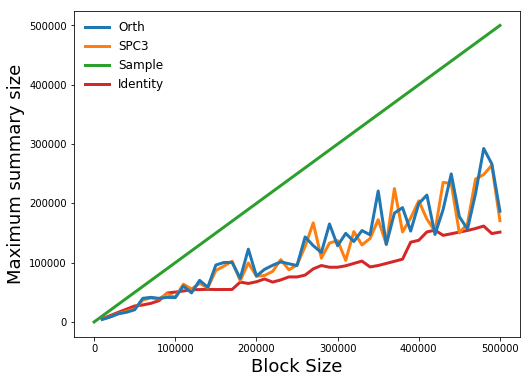

In [52]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['storage'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['storage'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['block_sizes'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['storage'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Maximum summary size', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Max rows stored (in stream) vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('census_space_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

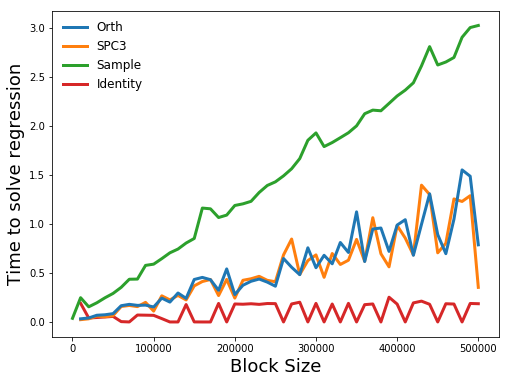

In [53]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['approx_regression_time'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time to solve regression', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to solve regression vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('census_regression_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

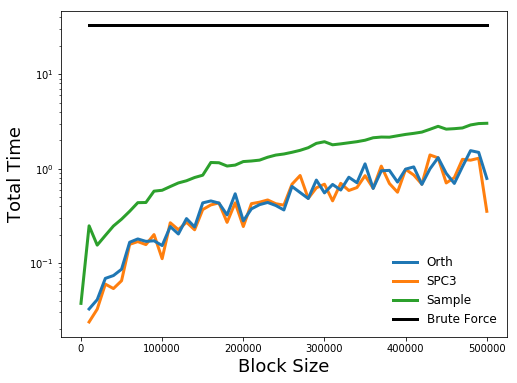

In [56]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['total_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['total_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['block_sizes'], mat_identity['total_time'], label = 'Identity',linewidth=3.0)
ax.plot(mat_spc3['block_sizes'], mat_spc3['full_regression_time'], color='black', label = 'Brute Force',linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Total Time', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Total Time  vs Block Size")
ax.legend(loc=4, frameon=False, fontsize=12)

fig.savefig('census_total_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

### Basis times

In [57]:
basis_orth = spio.loadmat('../scripts/census/basis_times/census_condition_spc3_basis_times.mat', squeeze_me=True)
basis_spc3 = spio.loadmat('../scripts/census/basis_times/census_orth_basis_times.mat', squeeze_me=True)


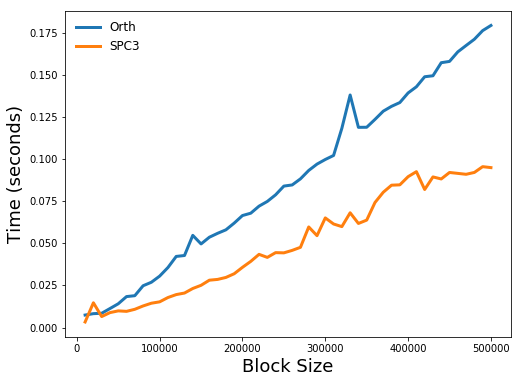

In [58]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'], label = 'Orth' , linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], label = 'SPC3', linewidth=3.0)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to compute basis  vs Block size", fontsize=18)
ax.legend(loc=0, frameon=False, fontsize=12)


fig.savefig('census_basis_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)